____
# <font color="green"> ICA: Building More SVD/PCA Intuition</font>
___

## Team 6:
- Graham Diedrich   (Penguins)
- Madhurya Shankar  (Iris)
- Vishal Kumar      (tips) 
- Rohan Ponramesh   (mpg) 

____

## <font color=#FFBB00> Part 1 </font>

In this first part we are going to do some simple plotting to understand what is behind PCA.

You will turn in one notebook as a group, but each person in your group will explore a separate dataset. Choose a dataset that has at least three columns of data as real numbers. (For example, iris and penguin datasets are like this; you need one per group member.) Coordinate with your group, starting by listing in a markdown who is in your group and which dataset they chose.

Follow these steps:

* Import your dataset,
* From that dataset, pick two of the "quantitative" columns (real numbers, not categories) and separate them from the other columns; you'll vary which columns you pick, so it doesn't matter at the moment which two you pick,
  * later, we will extend this to three columns; you might want to write your code to prepare for that now
* plot one column versus the other as a scatterplot; this is the 2D dataset you will be using,
  * use Plotly for this ICA, not matplotlib
* shift the data by removing the mean of each column, and plot that to confirm that the data is centered.

You want to avoid any interpretation issues associated with Simpson's Paradox; check your datasets and mask accordingly.


In [79]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [80]:
df=sns.load_dataset("mpg")

data=df[['weight','displacement']]
data

,weight,displacement
0,3504,307.0
1,3693,350.0
2,3436,318.0
3,3433,304.0
4,3449,302.0
...,...,...
393,2790,140.0
394,2130,97.0
395,2295,135.0
396,2625,120.0


In [81]:
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [82]:
px.scatter(x=data['weight'],y=data['displacement']).show()

In [83]:
mean_w=np.mean(data['weight'])
mean_d=np.mean(data['displacement'])

print(mean_w,mean_d)

2970.424623115578 193.42587939698493


In [84]:
data_mean_removed=data.copy()

data_mean_removed['weight']=data_mean_removed['weight']-mean_w
data_mean_removed['displacement']=data_mean_removed['displacement']-mean_d
data_mean_removed.dropna()
data_mean_removed.head()

,weight,displacement
0,533.575377,113.574121
1,722.575377,156.574121
2,465.575377,124.574121
3,462.575377,110.574121
4,478.575377,108.574121


In [85]:
px.scatter(x=data_mean_removed['weight'],y=data_mean_removed['displacement']).show()

As a review, take that scaled dataset and perform linear regression on it where the model is a line:
$$ y = w_0 + w_1x.$$
You have done this already: construct the relevant matrices and use `linalg.pinv`. You probably already have this code stored somewhere?

Plot the line with the data.

What you have done here is _regression_. You see that the line goes through the data in some optimal way. Try this with different combinations of columns.

Hopefully you are very fast at regression by now!



In [86]:
x=data_mean_removed['weight'].values
y=data_mean_removed['displacement'].values

A = np.vstack([np.ones_like(x), x]).T
weights = (np.linalg.pinv(A) @ y)
print(weights)
x_fit = np.linspace(min(x), max(x), 100)
y_fit = np.polyval(weights[::-1], x_fit)
fig = px.scatter(x=x, y=y, title="Linear Regression")
fig.add_scatter(x=x_fit, y=y_fit, mode="lines", name="Fitted Line")
fig.show()

[1.32758802e-14 1.14856666e-01]



___

We want to connect this idea to PCA. Take the scaled dataset and find its SVD.

Recall that the column vectors of $V$ point in the direction of the principal component (PC) axes. From the first column of $V$, find the direction of the first PC, PC1.

Plot a line that is in the direction of $v_1$ (first column of $V$). As a hint, note that since the data has been centered, all lines will go through the origin: you only need the slope of the line, which is the ratio of the elements in $v_1$. The first element is in the "_x_" direction and the second element is in the "_y_" direction, and their ratio is the slope.

Make a plot with the scattered data, the regression line and the line that is along $v_1$. Do the lines lie on top of each other? If they don't, do you have a bug?

Discuss with members of your group why you get the lines you get. How do you interpret them? Does it matter which columns you use?

How do the results differ across members of your group, each of whom are using a different dataset? Comment on what you see across datasets.

In [87]:

U, S, VT = np.linalg.svd(data_mean_removed)
V = VT.T

smaller = S[0]*np.outer(U[:,0],V[:,0])

fig = px.scatter(x=data_mean_removed['weight'], y=data_mean_removed['displacement'], title="SVD")
fig.add_scatter(x=smaller[:,0], y=smaller[:,1], mode="lines", name="SVD Line")
fig.add_scatter(x=x_fit, y=y_fit, mode="lines", name="Regression Line")

fig.show()



## Do the lines lie on top of each other? If they don't, do you have a bug?

- The regression line, formed by the displacement and weight columns in the MPG dataset, did not align with the direction of the first principal component (PC1). However, they were positioned nearer to each other. While the regression line aims to minimize the differences between observed and predicted values, PC1 indicates the direction of maximum variance within the data. The divergence between these lines implies that linear regression might not precisely capture the primary direction of variability present in the dataset.

- The regression line and the line along the direction of the first principal component (PC1) may not overlap because they serve different purposes. The regression line minimizes the sum of squared differences between observed and predicted values, while PC1 represents the direction of maximum variance in the data. Differences between these lines suggest that linear regression may not perfectly capture the primary direction of variability in the dataset.

- The regression line and the line along the direction of the first principal component (PC1) may not overlap because they serve different purposes. The regression line minimizes the sum of squared differences between observed and predicted values, while PC1 represents the direction of maximum variance in the data. Differences between these lines suggest that linear regression may not perfectly capture the primary direction of variability in the dataset.

- The lines of regression and PC1 may not coincide because they have different goals. The regression line tries to reduce the squared errors between the actual and predicted values, while PC1 shows the direction of greatest variation in the data. The discrepancy between these lines indicates that linear regression may not fully capture the main source of variability in the dataset.

## Discuss with members of your group why you get the lines you get. How do you interpret them? Does it matter which columns you use?

- The lines depicted in the plot using the MPG dataset, where the  regression line minimizes differences squared, aiming to offer the best linear fit for the chosen columns, while the PC1 direction line signifies the direction with the highest variance derived from SVD. Discrepancies between these lines suggest that linear regression might not precisely capture the primary direction of variability. The interpretation of these lines relies on context; a similar trajectory might imply alignment between linear relationships to the columns chosen to make the regression lines.

- The obtained lines in the plot serve distinct purposes: the regression line minimizes squared differences, indicating the best linear fit for the selected columns, while the PC1 direction line reflects the direction of maximum variance through SVD. Differences between these lines suggest that linear regression might not perfectly capture the primary variability direction. The interpretation of the lines is context-dependent; a similar trajectory may imply alignment between linear relationships and primary variability. The choice of columns is crucial, influencing the interpretation, as it determines the aspects of data under analysis. Careful consideration of dataset characteristics is necessary for meaningful interpretation of these lines in exploratory data analysis.

- The obtained lines in the plot serve distinct purposes: the regression line minimizes squared differences, indicating the best linear fit for the selected columns, while the PC1 direction line reflects the direction of maximum variance through SVD. Differences between these lines suggest that linear regression might not perfectly capture the primary variability direction. The interpretation of the lines is context-dependent; a similar trajectory may imply alignment between linear relationships and primary variability. The choice of columns is crucial, influencing the interpretation, as it determines the aspects of data under analysis. Careful consideration of dataset characteristics is necessary for meaningful interpretation of these lines in exploratory data analysis.

- The regression line tries to find the best linear fit for the chosen columns by minimizing the squared errors, while the PC1 direction line shows the direction of highest variation using SVD. The gap between these lines implies that linear regression may not accurately capture the main direction of variability. The meaning of the lines depends on the context; a similar slope may suggest a match between linear relationships and primary variability. The selection of columns is important, as it affects the interpretation, since it decides the aspects of data being analyzed. A careful examination of dataset features is required for a valid interpretation of these lines in exploratory data analysis.



```
`# This is formatted as code`
```



> Indented block


Uncomment this image:

 ![reg_vs_PCA](https://starship-knowledge.com/wp-content/uploads/2020/11/pvc_vs_linerregression-1024x724.jpeg) 

How does this connect with what you just did? In a markdown cell, describe in detail what you discovered. how can you interpret this in terms of what machine learning problem each of the methods is doing? That is, what question is regression answering and what question is PCA answering?

As some hints to discuss with your group members:
* when we do regression, we think of the $y$ variable as something we are predicting, a dependent variable,
* PCA is concerned with statistical properties of the data, each feature/column treated equally.

Summarize your discussion in a markdown cell.

**Linear regression is answering how one variable changes on average with respect to changes in another variable. Meanwhile, PCA is focused on capturing the maximum variance of data.**

____
## <font color=#FFBB00> Part 2 </font>

We are going to attempt to visualize what SVD, and therefore PCA, is doing.

From all of your datasets, now create a three-column version. It is important you don't train your intuition on just one dataset and incorrectly form general conclusions. Don't forget to remove the mean from each column.

We'll be in 3D now. Once your data is ready, center it and plot it as a [3D scatter plot](https://plotly.com/python/3d-scatter-plots/).


In [88]:

data3col=df[['weight','displacement','acceleration']]
data3col

,weight,displacement,acceleration
0,3504,307.0,12.0
1,3693,350.0,11.5
2,3436,318.0,11.0
3,3433,304.0,12.0
4,3449,302.0,10.5
...,...,...,...
393,2790,140.0,15.6
394,2130,97.0,24.6
395,2295,135.0,11.6
396,2625,120.0,18.6


In [89]:
fig = px.scatter_3d(data3col, x='weight', y='displacement', z='acceleration')
fig.show()

In [90]:
mean_w=np.mean(data3col['weight'])
mean_d=np.mean(data3col['displacement'])
mean_a=np.mean(data3col['acceleration'])

print(mean_a,mean_w,mean_d)




15.568090452261307 2970.424623115578 193.42587939698493


In [91]:
data3_mean_removed=data3col.copy()

data3_mean_removed['weight']=data3_mean_removed['weight']-mean_w
data3_mean_removed['displacement']=data3_mean_removed['displacement']-mean_d
data3_mean_removed['acceleration']=data3_mean_removed['acceleration']-mean_a

data3_mean_removed.dropna()
data3_mean_removed.head()

,weight,displacement,acceleration
0,533.575377,113.574121,-3.56809
1,722.575377,156.574121,-4.06809
2,465.575377,124.574121,-4.56809
3,462.575377,110.574121,-3.56809
4,478.575377,108.574121,-5.06809


In [92]:

U, S, VT = np.linalg.svd(data3_mean_removed)


data_one_sv = U[:, :1] @ np.diag(S[:1]) @ VT[:1, :]
data_two_sv = U[:, :2] @ np.diag(S[:2]) @ VT[:2, :]


Next, you are going to do exactly what you did above: dimensionality reduction with SVD.

Find the SVD of the 3D dataset you constructed and make two new versions of it: one that uses just one singular value and one that uses two.

For each of the datasets your group is using, plot the singular values versus index. Put them in one plot and explore how the SVs decay for each of the datasets.

Create the new datasets using:
$$X = \sum_{i=1}^r \sigma_i u_i v_i^T,$$
with only $@$ and Numpy (outer product) commands. This is _different_ from how we did it last week!

Note that in this expression $X$ always has the same shape no matter how many terms you retain in the sum: this is what the outer product is doing for you. But, each term changes the rank of the matrix: it might have the same shape, but it "lives" in a different subspace. This is what you will visualize.

In a markdown cell, comment on the size/shape of $X$ for different choices of $r$. Also, what is the rank of $X$ if we keep just the $i=1$ term? What is the rank of $X$ if we keep the first two terms? What do you think will happen if you plot a rank 1 matrix in 3D?

You should have about $12$ datasets now:
* original for each of the $4$ group members,
* smallest SV set to zero, for each dataset,
* two smallest SVs set to zero, for each dataset.

Make a 3D scatterplot in Plotly (so that you can rotate the plot) of all datasets:
* the original (all terms in the sum),
* one singular value (keep only first term),
* two singular values (drop final term in the sum).

In a markdown cell, comment on what you learned from making this plot. What is the connection between rank and dimensionality?

Plot the "explained variance" for each of these. That is plot
$$\mathrm{EV}_i  = \frac{\sigma_i^2}{\sum_j \sigma_j^2}$$
versus $i$.




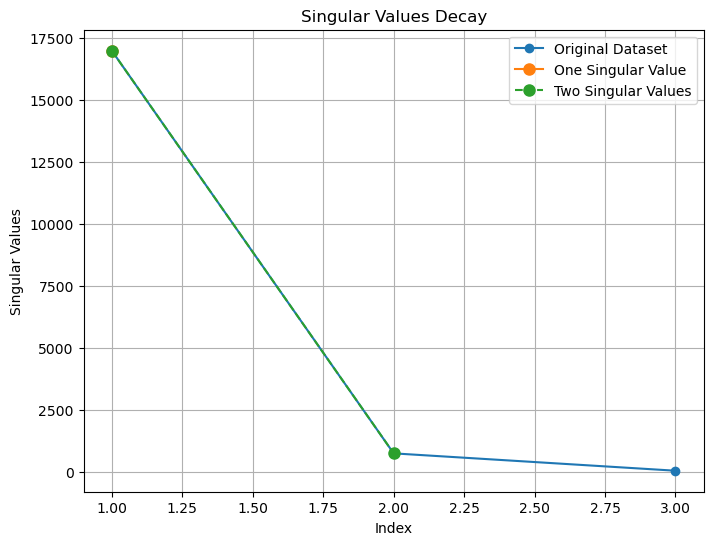

In [93]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(S) + 1), S, marker='o', label='Original Dataset')
plt.plot(1, S[0], marker='o', markersize=8, label='One Singular Value')
plt.plot([1, 2], S[:2], marker='o', markersize=8, linestyle='--', label='Two Singular Values')
plt.xlabel('Index')
plt.ylabel('Singular Values')
plt.title('Singular Values Decay')
plt.legend()
plt.grid(True)
plt.show()

In [94]:
import plotly.graph_objects as go


data = np.array(data3_mean_removed)

U, S, Vt = np.linalg.svd(data)

datasets = []
for i in range(1, 4):
    reconstructed_data = np.outer(U[:, :i] @ np.diag(S[:i]), Vt[:i, :])
    datasets.append(reconstructed_data)

trace_original = go.Scatter3d(
    x=data[:, 0],
    y=data[:, 1],
    z=data[:, 2],
    mode='markers',
    marker=dict(size=5),
    name='Original Dataset'
)

traces = []
labels = ['One Singular Value', 'Two Singular Values', 'Three Singular Values']
for i in range(len(datasets)):
    trace = go.Scatter3d(
        x=datasets[i][:, 0],
        y=datasets[i][:, 1],
        z=datasets[i][:, 2],
        mode='markers',
        marker=dict(size=5),
        name=labels[i]
    )
    traces.append(trace)

fig = go.Figure(data=[trace_original] + traces)

fig.update_layout(
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    title='3D Scatter Plot of mpg'
)

fig.show()


Plotting the original dataset and the reconstructed datasets ( in a 3D scatter plot allows us to observe how reducing the number of singular values affects the dataset's structure in terms of variance and dimensionality, there is significant changes to the values but the direction in which the values are aligned are similar